In [2]:
import pandas as pd
import numpy as np
# from wordcloud import WordCloud,STOPWORDS
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import matplotlib.pyplot as plt

In [3]:
df1=pd.read_csv("D:/LY PROJECT/dataset/datawithoglist.csv")
df2=pd.read_csv("D:/LY PROJECT/dataset/datawithsmote.csv")
df3=pd.read_csv("D:/LY PROJECT/dataset/datawithcossmote.csv")

In [4]:
df1.head(2)

,Unnamed: 0,Unnamed: 0.1,body,description,title,url,cleaned_website_text,no of matched keywords,words matched,percent,category
0,0,0,"\n \n \n \n \n \n No cookies, no javascript, n...","Drugs Store - buy Ecstasy, Cocaine, LSD, Meth.",Cocaine Drugs,http://fc3ryhftqfgwyroq7pt63f7jif4jknfrmd3pbdw...,cookie javascript trace protect privacy home q...,13,"['cannabis', 'cannabis', 'cocaine', 'ecstasy',...",4.100946,drug
1,1,1,"\n \n \n \n \n \n No cookies, no javascript, n...","Drugs Store - buy Ecstasy, Cocaine, LSD, Meth.",Cannabis,http://r3q6nxpmfdxhzz3oumaseyfr5qujvg4cayzvj2y...,cookie javascript trace protect privacy home q...,13,"['cannabis', 'cannabis', 'cocaine', 'ecstasy',...",4.100946,drug


In [5]:
df2.head(2)

,Unnamed: 0,Unnamed: 0.1,body,description,title,url,cleaned_website_text,no of matched keywords,words matched,percent,category
0,0,0,"\n \n \n \n \n \n No cookies, no javascript, n...","Drugs Store - buy Ecstasy, Cocaine, LSD, Meth.",Cocaine Drugs,http://fc3ryhftqfgwyroq7pt63f7jif4jknfrmd3pbdw...,cookie javascript trace protect privacy home q...,6,"['privacy', 'g', 'mix', 'g', 'mg', 'drugs']",1.892744,drug
1,1,1,"\n \n \n \n \n \n No cookies, no javascript, n...","Drugs Store - buy Ecstasy, Cocaine, LSD, Meth.",Cannabis,http://r3q6nxpmfdxhzz3oumaseyfr5qujvg4cayzvj2y...,cookie javascript trace protect privacy home q...,6,"['privacy', 'g', 'mix', 'g', 'mg', 'drugs']",1.892744,drug


In [6]:
df3.head(2)

,Unnamed: 0,Unnamed: 0.1,body,description,title,url,cleaned_website_text,no of matched keywords,words matched,percent,category
0,0,0,"\n \n \n \n \n \n No cookies, no javascript, n...","Drugs Store - buy Ecstasy, Cocaine, LSD, Meth.",Cocaine Drugs,http://fc3ryhftqfgwyroq7pt63f7jif4jknfrmd3pbdw...,cookie javascript trace protect privacy home q...,15,"['cannabis', 'cannabis', 'cocaine', 'ecstasy',...",4.731861,drug
1,1,1,"\n \n \n \n \n \n No cookies, no javascript, n...","Drugs Store - buy Ecstasy, Cocaine, LSD, Meth.",Cannabis,http://r3q6nxpmfdxhzz3oumaseyfr5qujvg4cayzvj2y...,cookie javascript trace protect privacy home q...,15,"['cannabis', 'cannabis', 'cocaine', 'ecstasy',...",4.731861,drug


In [7]:
df1['category'].value_counts()

drug        11745
non drug     8489
Name: category, dtype: int64

In [8]:
df2['category'].value_counts()

drug        20091
non drug      143
Name: category, dtype: int64

In [9]:
df3['category'].value_counts()

drug        17565
non drug     2669
Name: category, dtype: int64

<H3>DATA CLEANING</H3>

In [10]:
df=df1[["url","cleaned_website_text","category"]]
df['category_smote']=df2['category']
df['category_cossmote']=df3['category']
df

C:\Users\hetul\AppData\Local\Temp/ipykernel_19588/2432240251.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['category_smote']=df2['category']
C:\Users\hetul\AppData\Local\Temp/ipykernel_19588/2432240251.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['category_cossmote']=df3['category']


,url,cleaned_website_text,category,category_smote,category_cossmote
0,http://fc3ryhftqfgwyroq7pt63f7jif4jknfrmd3pbdw...,cookie javascript trace protect privacy home q...,drug,drug,drug
1,http://r3q6nxpmfdxhzz3oumaseyfr5qujvg4cayzvj2y...,cookie javascript trace protect privacy home q...,drug,drug,drug
2,http://7nroowrqwdgbyajwrynxtypkdi46f22akwki73e...,home catalog question answer cart contact escr...,drug,drug,drug
3,http://hpcphv5q3lhiebh6c765lslihne4tn6ui5dnd63...,home catalog question answer cart contact cate...,drug,drug,drug
4,http://lnn6isw6tkbmplxe7eisjpf7nw6mmbwc7wjjuyh...,cookie javascript trace protect privacy home q...,drug,drug,drug
...,...,...,...,...,...
20229,https://archive.nytimesn7cgmftshazwhfgzm37qxb4...,january internet forever mutating debates rela...,drug,drug,drug
20230,https://archive.nytimesn7cgmftshazwhfgzm37qxb4...,january technology highlights related articles...,drug,drug,drug
20231,https://archive.nytimesn7cgmftshazwhfgzm37qxb4...,credit new york times article home site index ...,non drug,drug,non drug
20232,https://archive.nytimesn7cgmftshazwhfgzm37qxb4...,volatile day volatile year wall street clean n...,non drug,drug,non drug


In [11]:
df['category_cossmote'].value_counts()

drug        17565
non drug     2669
Name: category_cossmote, dtype: int64

In [12]:
df['cat_id']=df1['category']
df['cat_id_smote']=df2['category']
df['cat_id_cossmote']=df3['category']
df['cat_id'].replace({'drug':1,"non drug":0},inplace=True)
df['cat_id_smote'].replace({'drug':1,"non drug":0},inplace=True)
df['cat_id_cossmote'].replace({'drug':1,"non drug":0},inplace=True)
df

C:\Users\hetul\AppData\Local\Temp/ipykernel_19588/1114713700.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cat_id']=df1['category']
C:\Users\hetul\AppData\Local\Temp/ipykernel_19588/1114713700.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cat_id_smote']=df2['category']
C:\Users\hetul\AppData\Local\Temp/ipykernel_19588/1114713700.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See th

,url,cleaned_website_text,category,category_smote,category_cossmote,cat_id,cat_id_smote,cat_id_cossmote
0,http://fc3ryhftqfgwyroq7pt63f7jif4jknfrmd3pbdw...,cookie javascript trace protect privacy home q...,drug,drug,drug,1,1,1
1,http://r3q6nxpmfdxhzz3oumaseyfr5qujvg4cayzvj2y...,cookie javascript trace protect privacy home q...,drug,drug,drug,1,1,1
2,http://7nroowrqwdgbyajwrynxtypkdi46f22akwki73e...,home catalog question answer cart contact escr...,drug,drug,drug,1,1,1
3,http://hpcphv5q3lhiebh6c765lslihne4tn6ui5dnd63...,home catalog question answer cart contact cate...,drug,drug,drug,1,1,1
4,http://lnn6isw6tkbmplxe7eisjpf7nw6mmbwc7wjjuyh...,cookie javascript trace protect privacy home q...,drug,drug,drug,1,1,1
...,...,...,...,...,...,...,...,...
20229,https://archive.nytimesn7cgmftshazwhfgzm37qxb4...,january internet forever mutating debates rela...,drug,drug,drug,1,1,1
20230,https://archive.nytimesn7cgmftshazwhfgzm37qxb4...,january technology highlights related articles...,drug,drug,drug,1,1,1
20231,https://archive.nytimesn7cgmftshazwhfgzm37qxb4...,credit new york times article home site index ...,non drug,drug,non drug,0,1,0
20232,https://archive.nytimesn7cgmftshazwhfgzm37qxb4...,volatile day volatile year wall street clean n...,non drug,drug,non drug,0,1,0


In [13]:
df.cat_id.value_counts()

1    11745
0     8489
Name: cat_id, dtype: int64

In [14]:
df.cat_id_smote.value_counts()

1    20091
0      143
Name: cat_id_smote, dtype: int64

In [15]:
df.cat_id_cossmote.value_counts()

1    17565
0     2669
Name: cat_id_cossmote, dtype: int64

In [16]:
# from wordcloud import WordCloud,STOPWORDS
# plt.figure(figsize=(40,25))
# subset = df1[df1['category']=='drug']
# text = subset.cleaned_website_text.values
# cloud1=WordCloud(stopwords=STOPWORDS,background_color='pink',colormap="Dark2",collocations=False,width=2500,height=1800
#                        ).generate(" ".join(text))
# plt.subplot(2,2,1)
# plt.axis('off')
# plt.title("Drugs",fontsize=40)
# plt.imshow(cloud1)
# subset = df[df['category']=='non drug']
# text = subset.cleaned_website_text.values
# cloud2=WordCloud(stopwords=STOPWORDS,background_color='pink',colormap="Dark2",collocations=False,width=2500,height=1800
#                        ).generate(" ".join(text))
# plt.subplot(2,2,2)
# plt.axis('off')
# plt.title("Non-Drug",fontsize=40)
# plt.imshow(cloud2)

In [17]:
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=10,ngram_range=(1, 1), stop_words='english')

# We transform each cleaned_text into a vector
features = tfidf.fit_transform(df.cleaned_website_text).toarray()

print("Each of the %d text is represented by %d features (TF-IDF score of unigrams)" %(features.shape))

Each of the 20234 text is represented by 37368 features (TF-IDF score of unigrams)


In [18]:
labels_1 = df.cat_id
labels_2 = df.cat_id_smote
labels_3 = df.cat_id_cossmote

In [19]:
model1 = LogisticRegression(random_state=0)
model2 = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=0)
model3 = LinearSVC()

<H3>ORIGINAL LIST</H3>


==>CLASSIFICATIION METRICS FOR DATA WITH ORIGINAL LIST- LOGISTIC REGRESSION

ACCURACY:  0.80846016999407
              precision    recall  f1-score   support

        drug       0.82      0.85      0.84      2937
    non drug       0.79      0.75      0.77      2122

    accuracy                           0.81      5059
   macro avg       0.80      0.80      0.80      5059
weighted avg       0.81      0.81      0.81      5059



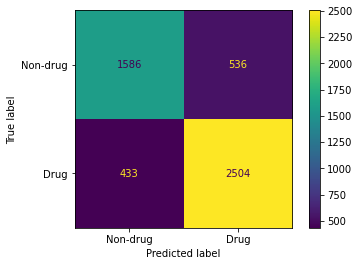


==>CLASSIFICATIION METRICS FOR DATA WITH ORIGINAL LIST- RANDOM FOREST:
ACCURACY:  0.7204981221585294
              precision    recall  f1-score   support

        drug       0.71      0.87      0.78      2937
    non drug       0.74      0.52      0.61      2122

    accuracy                           0.72      5059
   macro avg       0.73      0.69      0.70      5059
weighted avg       0.72      0.72      0.71      5059



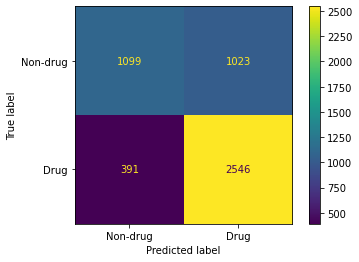


==>CLASSIFICATIION METRICS FOR DATA WITH ORIGINAL LIST- SUPPORT VECTORS

ACCURACY:  0.8626210713579758
              precision    recall  f1-score   support

        drug       0.88      0.88      0.88      2937
    non drug       0.84      0.84      0.84      2122

    accuracy                           0.86      5059
   macro avg       0.86      0.86      0.86      5059
weighted avg       0.86      0.86      0.86      5059



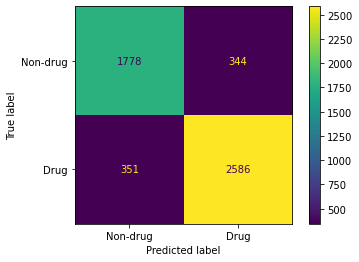

In [23]:
X_train, X_test, y_train, y_test,indices_train,indices_test = train_test_split(features, labels_1,df.index, test_size=0.25, 
                                                               random_state=1,stratify=labels_1)
# y_train=y_train.tolist()
# y_test=y_test.tolist()
model1.fit(X_train, y_train)
y_pred_OG1 = model1.predict(X_test)
print('\n==>CLASSIFICATIION METRICS FOR DATA WITH ORIGINAL LIST- LOGISTIC REGRESSION\n')
print("ACCURACY: ",metrics.accuracy_score(y_test, y_pred_OG1))
# Classification report
print(metrics.classification_report(y_test,y_pred_OG1,labels=[1,0],target_names= df['category'].unique()))
#Confusion matrix
conf_mat = metrics.confusion_matrix(y_test, y_pred_OG1)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = conf_mat, display_labels = ['Non-drug','Drug'])
cm_display.plot()
plt.show()

model2.fit(X_train, y_train)
y_pred_OG2 = model2.predict(X_test)
print('\n==>CLASSIFICATIION METRICS FOR DATA WITH ORIGINAL LIST- RANDOM FOREST:')
print("ACCURACY: ",metrics.accuracy_score(y_test, y_pred_OG2))
print(metrics.classification_report(y_test,y_pred_OG2,labels=[1,0],target_names= df['category'].unique()))
conf_mat = metrics.confusion_matrix(y_test, y_pred_OG2)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = conf_mat, display_labels = ['Non-drug','Drug'])
cm_display.plot()
plt.show()

model3.fit(X_train, y_train)
y_pred_OG3 = model3.predict(X_test)
print('\n==>CLASSIFICATIION METRICS FOR DATA WITH ORIGINAL LIST- SUPPORT VECTORS\n')
print("ACCURACY: ",metrics.accuracy_score(y_test, y_pred_OG3))
print(metrics.classification_report(y_test,y_pred_OG3,labels=[1,0],target_names= df['category'].unique()))
#Confusion matrix
conf_mat = metrics.confusion_matrix(y_test, y_pred_OG3)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = conf_mat, display_labels = ['Non-drug','Drug'])
cm_display.plot()
plt.show()

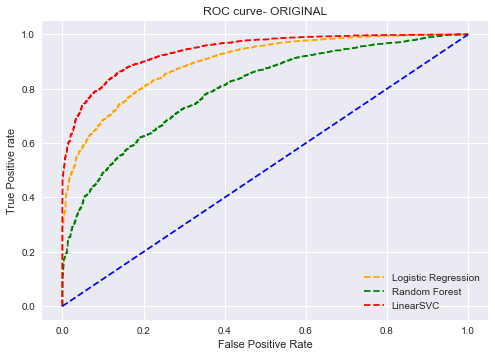

In [24]:
pred_prob1 = model1.predict_proba(X_test)
pred_prob2 = model2.predict_proba(X_test)
pred_prob3 = model3._predict_proba_lr(X_test)
from sklearn.metrics import roc_curve

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, pred_prob2[:,1], pos_label=1)
fpr3, tpr3, thresh3 = roc_curve(y_test, pred_prob3[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Logistic Regression')
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='Random Forest')
plt.plot(fpr3, tpr3, linestyle='--',color='red', label='LinearSVC')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve- ORIGINAL')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

<H3>SMOTE LIST</H3>

In [25]:
# index_train=indices_train.tolist()
# index_test=indices_test.tolist()
# y_train_s=[]
# y_test_s=[]
# for i in index_train:
#     y_train_s.append(df['cat_id_smote'].iloc[i])
# for i in index_test:
#     y_test_s.append(df['cat_id_smote'].iloc[i])


==>CLASSIFICATIION METRICS FOR DATA WITH SMOTE- LOGISTIC REGRESSION

ACCURACY:  0.9954536469658035
              precision    recall  f1-score   support

        drug       1.00      1.00      1.00      5023
    non drug       1.00      0.36      0.53        36

    accuracy                           1.00      5059
   macro avg       1.00      0.68      0.76      5059
weighted avg       1.00      1.00      0.99      5059



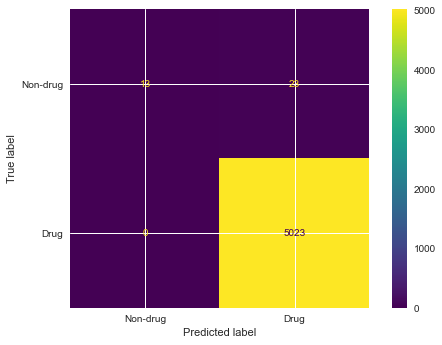


==>CLASSIFICATIION METRICS FOR DATA WITH SMOTE- RANDOM FOREST

ACCURACY:  0.9928839691638663
              precision    recall  f1-score   support

        drug       0.99      1.00      1.00      5023
    non drug       0.00      0.00      0.00        36

    accuracy                           0.99      5059
   macro avg       0.50      0.50      0.50      5059
weighted avg       0.99      0.99      0.99      5059



C:\Users\hetul\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hetul\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hetul\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

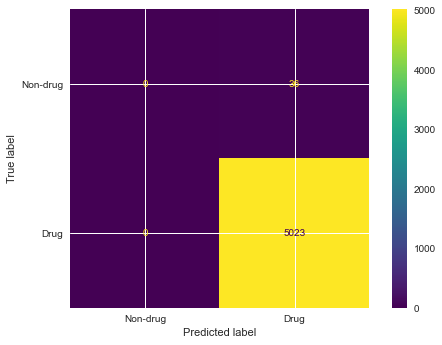


==>CLASSIFICATIION METRICS FOR DATA WITH SMOTE- SUPPORT VECTORS

ACCURACY:  0.9964419845819332
              precision    recall  f1-score   support

        drug       1.00      1.00      1.00      5023
    non drug       0.85      0.61      0.71        36

    accuracy                           1.00      5059
   macro avg       0.92      0.81      0.85      5059
weighted avg       1.00      1.00      1.00      5059



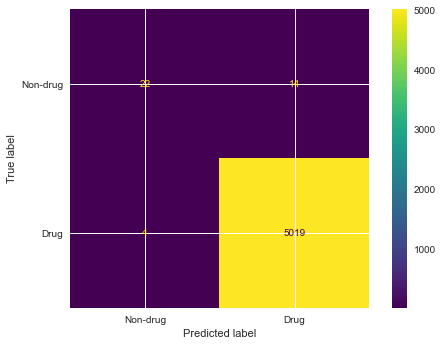

In [26]:
X_train, X_test, y_train, y_test,indices_train,indices_test = train_test_split(features, labels_2,df.index, test_size=0.25, 
                                                               random_state=1,stratify=labels_2)
model1.fit(X_train, y_train)
y_pred_S1 = model1.predict(X_test)
print('\n==>CLASSIFICATIION METRICS FOR DATA WITH SMOTE- LOGISTIC REGRESSION\n')
print("ACCURACY: ",metrics.accuracy_score(y_test, y_pred_S1))
# Classification report
print(metrics.classification_report(y_test,y_pred_S1,labels=[1,0],target_names= df['category'].unique()))
#Confusion matrix
conf_mat = metrics.confusion_matrix(y_test, y_pred_S1)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = conf_mat, display_labels = ['Non-drug','Drug'])
cm_display.plot()
plt.show()

model2.fit(X_train, y_train)
y_pred_S2 = model2.predict(X_test)
print('\n==>CLASSIFICATIION METRICS FOR DATA WITH SMOTE- RANDOM FOREST\n')
print("ACCURACY: ",metrics.accuracy_score(y_test, y_pred_S2))
# Classification report
print(metrics.classification_report(y_test,y_pred_S2,labels=[1,0],target_names= df['category'].unique()))
#Confusion matrix
conf_mat = metrics.confusion_matrix(y_test, y_pred_S2)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = conf_mat, display_labels = ['Non-drug','Drug'])
cm_display.plot()
plt.show()

model3.fit(X_train, y_train)
y_pred_S3 = model3.predict(X_test)
print('\n==>CLASSIFICATIION METRICS FOR DATA WITH SMOTE- SUPPORT VECTORS\n')
print("ACCURACY: ",metrics.accuracy_score(y_test, y_pred_S3))
# Classification report
print(metrics.classification_report(y_test,y_pred_S3,labels=[1,0],target_names= df['category'].unique()))
#Confusion matrix
conf_mat = metrics.confusion_matrix(y_test, y_pred_S3)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = conf_mat, display_labels = ['Non-drug','Drug'])
cm_display.plot()
plt.show()

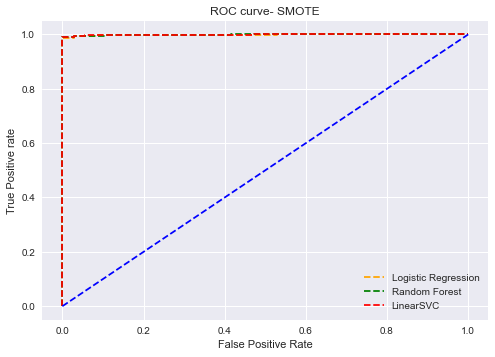

In [27]:
pred_prob1 = model1.predict_proba(X_test)
pred_prob2 = model2.predict_proba(X_test)
pred_prob3 = model3._predict_proba_lr(X_test)
from sklearn.metrics import roc_curve

# roc curve for models
fpr11, tpr11, thresh11 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)
fpr21, tpr21, thresh21 = roc_curve(y_test, pred_prob2[:,1], pos_label=1)
fpr31, tpr31, thresh31 = roc_curve(y_test, pred_prob3[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr11, tpr11, linestyle='--',color='orange', label='Logistic Regression')
plt.plot(fpr21, tpr21, linestyle='--',color='green', label='Random Forest')
plt.plot(fpr31, tpr31, linestyle='--',color='red', label='LinearSVC')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve- SMOTE')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();


<H3>SMOTE COSINE LIST</H3>

In [28]:
# y_train_c=[]
# y_test_c=[]
# for i in index_train:
#     y_train_c.append(df['cat_id_cossmote'].iloc[i])
# for i in index_test:
#     y_test_c.append(df['cat_id_cossmote'].iloc[i])


==>CLASSIFICATIION METRICS FOR DATA WITH COSINE SMOTE- LOGISTIC REGRESSION

ACCURACY:  0.9238980035580154
              precision    recall  f1-score   support

        drug       0.93      0.99      0.96      4392
    non drug       0.86      0.51      0.64       667

    accuracy                           0.92      5059
   macro avg       0.89      0.75      0.80      5059
weighted avg       0.92      0.92      0.92      5059



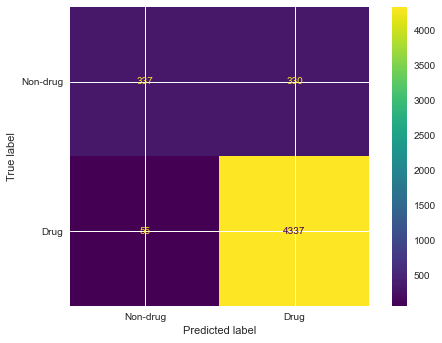


==>CLASSIFICATIION METRICS FOR DATA WITH COSINE SMOTE- RANDOM FOREST

ACCURACY:  0.8843644989128286
              precision    recall  f1-score   support

        drug       0.88      1.00      0.94      4392
    non drug       0.99      0.12      0.22       667

    accuracy                           0.88      5059
   macro avg       0.94      0.56      0.58      5059
weighted avg       0.90      0.88      0.84      5059



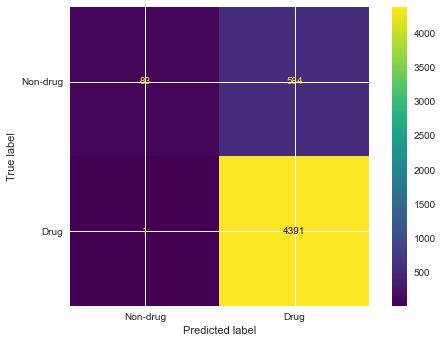


==>CLASSIFICATIION METRICS FOR DATA WITH COSINE SMOTE- SUPPORT VECTORS

ACCURACY:  0.9292350266851156
              precision    recall  f1-score   support

        drug       0.94      0.98      0.96      4392
    non drug       0.80      0.62      0.70       667

    accuracy                           0.93      5059
   macro avg       0.87      0.80      0.83      5059
weighted avg       0.92      0.93      0.93      5059



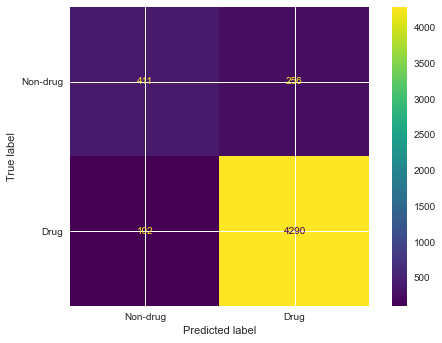

In [29]:
X_train, X_test, y_train, y_test,indices_train,indices_test = train_test_split(features, labels_3,df.index, test_size=0.25, 
                                                               random_state=1,stratify=labels_3)
model1.fit(X_train, y_train)
y_pred_C1 = model1.predict(X_test)
print('\n==>CLASSIFICATIION METRICS FOR DATA WITH COSINE SMOTE- LOGISTIC REGRESSION\n')
print("ACCURACY: ",metrics.accuracy_score(y_test, y_pred_C1))
# Classification report
print(metrics.classification_report(y_test,y_pred_C1,labels=[1,0],target_names= df['category'].unique()))
#Confusion matrix
conf_mat = metrics.confusion_matrix(y_test, y_pred_C1)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = conf_mat, display_labels = ['Non-drug','Drug'])
cm_display.plot()
plt.show()

model2.fit(X_train, y_train)
y_pred_C2 = model2.predict(X_test)
print('\n==>CLASSIFICATIION METRICS FOR DATA WITH COSINE SMOTE- RANDOM FOREST\n')
print("ACCURACY: ",metrics.accuracy_score(y_test, y_pred_C2))
# Classification report
print(metrics.classification_report(y_test,y_pred_C2,labels=[1,0],target_names= df['category'].unique()))
#Confusion matrix
conf_mat = metrics.confusion_matrix(y_test, y_pred_C2)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = conf_mat, display_labels = ['Non-drug','Drug'])
cm_display.plot()
plt.show()

model3.fit(X_train, y_train)
y_pred_C3 = model3.predict(X_test)
print('\n==>CLASSIFICATIION METRICS FOR DATA WITH COSINE SMOTE- SUPPORT VECTORS\n')
print("ACCURACY: ",metrics.accuracy_score(y_test, y_pred_C3))
# Classification report
print(metrics.classification_report(y_test,y_pred_C3,labels=[1,0],target_names= df['category'].unique()))
#Confusion matrix
conf_mat = metrics.confusion_matrix(y_test, y_pred_C3)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = conf_mat, display_labels = ['Non-drug','Drug'])
cm_display.plot()
plt.show()

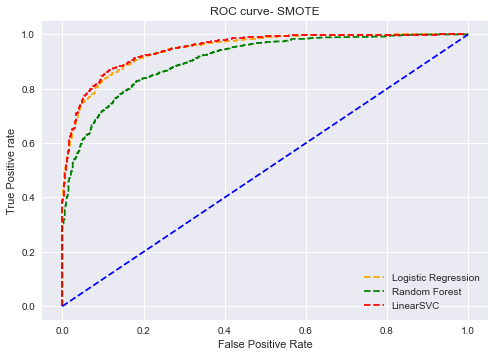

In [30]:
pred_prob1 = model1.predict_proba(X_test)
pred_prob2 = model2.predict_proba(X_test)
pred_prob3 = model3._predict_proba_lr(X_test)
from sklearn.metrics import roc_curve

# roc curve for models
fpr111, tpr111, thresh111 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)
fpr211, tpr211, thresh211 = roc_curve(y_test, pred_prob2[:,1], pos_label=1)
fpr311, tpr311, thresh311 = roc_curve(y_test, pred_prob3[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr111, tpr111, linestyle='--',color='orange', label='Logistic Regression')
plt.plot(fpr211, tpr211, linestyle='--',color='green', label='Random Forest')
plt.plot(fpr311, tpr311, linestyle='--',color='red', label='LinearSVC')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve- SMOTE')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();


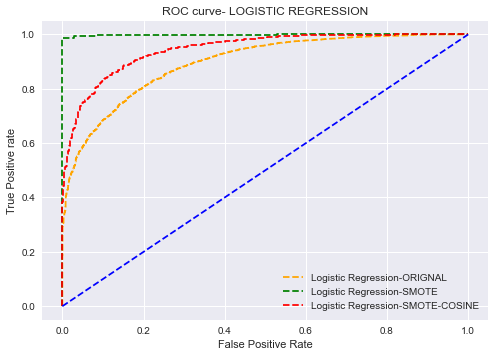

In [35]:
# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='ORANGE', label='Logistic Regression-ORIGNAL')
plt.plot(fpr11, tpr11, linestyle='--',color='green', label='Logistic Regression-SMOTE')
plt.plot(fpr111, tpr111, linestyle='--',color='red', label='Logistic Regression-SMOTE-COSINE')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve- LOGISTIC REGRESSION')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();


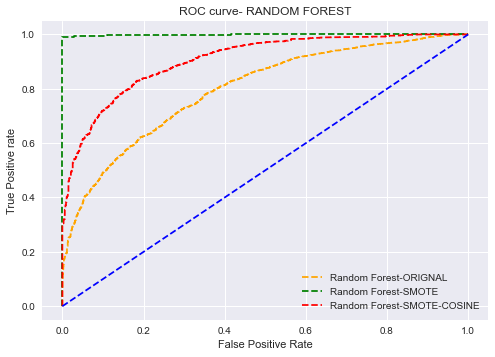

In [32]:
# plot roc curves
plt.plot(fpr2, tpr2, linestyle='--',color='orange', label='Random Forest-ORIGNAL')
plt.plot(fpr21, tpr21, linestyle='--',color='green', label='Random Forest-SMOTE')
plt.plot(fpr211, tpr211, linestyle='--',color='red', label='Random Forest-SMOTE-COSINE')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve- RANDOM FOREST')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();


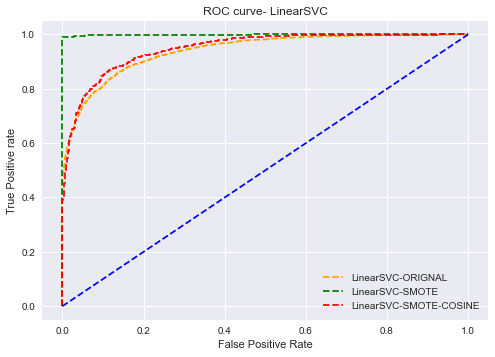

In [33]:
# plot roc curves
plt.plot(fpr3, tpr3, linestyle='--',color='orange', label='LinearSVC-ORIGNAL')
plt.plot(fpr31, tpr31, linestyle='--',color='green', label='LinearSVC-SMOTE')
plt.plot(fpr311, tpr311, linestyle='--',color='red', label='LinearSVC-SMOTE-COSINE')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve- LinearSVC')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();
